# Вебинар 4. Обучение с учителем.

## <center>Обучение с учителем и без<center>

<img src="SuperUnsuper.png" alt="Drawing" style="width: 1000px;">

## <center>Задачи "Обучения с учителем"<center>

### Регрессия

**Линейная регрессия (линейные алгоритмы)**

<img src="lin_reg.png" alt="Drawing" style="width: 700px;">

---

**Подключение библиотек и скриптов**

In [10]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
matplotlib.rcParams.update({'font.size': 14})

In [13]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" +
          str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

**Пути к директориям и файлам**

In [58]:
PREPARED_DATASET_PATH = 'housing_prepared.csv'
TRAIN_DATASET_PATH = 'housing_train.csv'
SCALER_FILE_PATH = 'scaler.pkl'
MODEL_FILE_PATH = 'model.pkl' 

### Загрузка данных

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

In [59]:
df = pd.read_csv(PREPARED_DATASET_PATH)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,City
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0,1


In [60]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,City
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.00000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569308,35.631673,28.665746,2635.763081,536.74841,1417.860562,499.539680,3.870671,206855.816909,0.443314,0.316957,0.000242,0.110853,0.128634,0.383527
std,2.003455,2.135854,12.355019,2181.615252,419.45420,1119.445348,382.329753,1.899822,115395.615874,0.496788,0.465302,0.015563,0.313957,0.334802,0.486257
min,-124.350000,32.540000,1.000000,2.000000,1.00000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,19.000000,1447.750000,297.00000,797.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.00000,1165.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.25000,1701.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.00000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.shape

(20640, 16)

In [17]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
<1H OCEAN               int64
INLAND                  int64
ISLAND                  int64
NEAR BAY                int64
NEAR OCEAN              int64
City                    int64
dtype: object

### Отбор примеров

In [18]:
df['median_house_value'].value_counts().head(10)

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
225000.0     92
350000.0     79
87500.0      78
275000.0     65
150000.0     64
Name: median_house_value, dtype: int64

In [61]:
df = df[df['median_house_value'] <= 500000].reset_index(drop=True)

In [20]:
df['median_house_value'].value_counts().head(10)

137500.0    122
162500.0    117
112500.0    103
187500.0     93
225000.0     92
350000.0     79
87500.0      78
275000.0     65
150000.0     64
175000.0     63
Name: median_house_value, dtype: int64

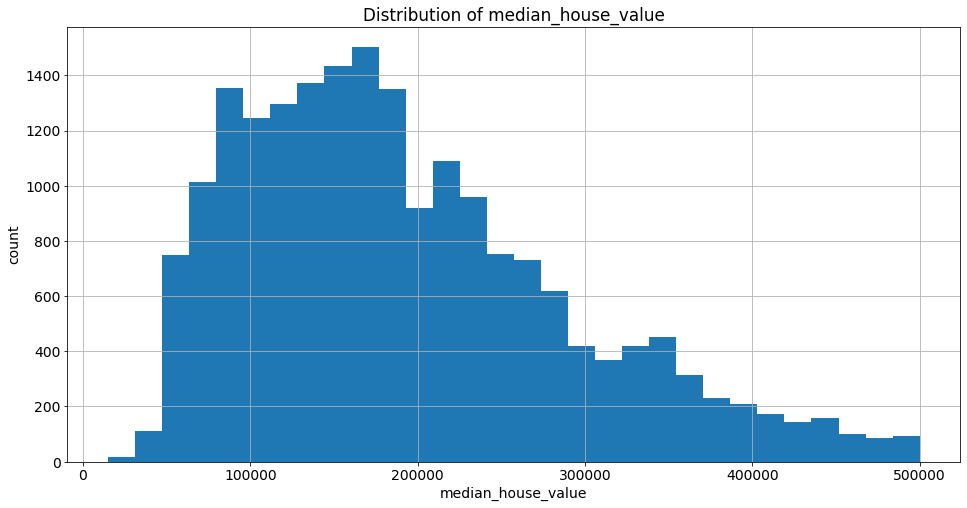

In [52]:
plt.figure(figsize = (16, 8))

df['median_house_value'].hist(bins=30)
plt.ylabel('count')
plt.xlabel('median_house_value')

plt.title('Distribution of median_house_value')
plt.show()

### Отбор признаков

In [17]:
df.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN',
 'City']

In [62]:
feature_names = ['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']
target_name = ['median_house_value']

In [63]:
df = df[feature_names + target_name]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,342200.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-1.329639,1.036644,1.024342,-0.797584,-0.973934,-0.982558,-0.978946,2.960380,0,0,0,1,0,452600.0
1,-1.324654,1.027340,-0.604232,2.053478,1.349786,0.856557,1.661594,2.945223,0,0,0,1,0,358500.0
2,-1.334624,1.022688,1.920057,-0.528477,-0.828850,-0.828635,-0.845876,2.280353,0,0,0,1,0,352100.0
3,-1.339609,1.022688,1.920057,-0.616957,-0.721821,-0.773789,-0.736288,1.252288,0,0,0,1,0,341300.0
4,-1.339609,1.022688,1.920057,-0.455126,-0.614792,-0.767596,-0.631919,0.107935,0,0,0,1,0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19670,-0.761337,1.780952,-0.278517,-0.437705,-0.391220,-0.519904,-0.446664,-1.347837,0,1,0,0,0,78100.0
19671,-0.821158,1.785604,-0.848518,-0.881479,-0.923987,-0.952481,-1.010257,-0.713218,0,1,0,0,0,77100.0
19672,-0.826144,1.757693,-0.929947,-0.167682,-0.127215,-0.236827,-0.177913,-1.258870,0,1,0,0,0,92300.0
19673,-0.875995,1.757693,-0.848518,-0.348309,-0.307975,-0.611904,-0.397088,-1.152388,0,1,0,0,0,84700.0


### Стандартизация признаков

In [55]:
feature_names_for_stand = df[feature_names].select_dtypes(include='float64').columns.tolist()
feature_names_for_stand

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [26]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names_for_stand])
#scaler.fit(df[feature_names_for_stand])
#stand_features = scaler.transform(df[feature_names_for_stand])


In [23]:
stand_features

array([[-1.32963923,  1.03664377,  1.0243417 , ..., -0.98255785,
        -0.97894646,  2.96038034],
       [-1.32465412,  1.02733991, -0.60423181, ...,  0.85655696,
         1.66159385,  2.94522334],
       [-1.33462434,  1.02268799,  1.92005713, ..., -0.82863482,
        -0.84587575,  2.28035331],
       ...,
       [-0.82614358,  1.75769251, -0.92994652, ..., -0.23682731,
        -0.17791299, -1.25886958],
       [-0.87599464,  1.75769251, -0.84851784, ..., -0.61190412,
        -0.39708827, -1.15238848],
       [-0.83611379,  1.72978094, -1.01137519, ..., -0.04044276,
         0.07518228, -0.82033558]])

In [56]:
df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [57]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
count,1.967500e+04,1.967500e+04,1.967500e+04,1.967500e+04,1.967500e+04,1.967500e+04,1.967500e+04,1.967500e+04,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000
mean,-7.051313e-16,-7.947718e-15,3.373667e-15,-9.506302e-17,-1.862720e-16,1.240043e-16,-6.559274e-17,-9.450015e-17,0.438018,0.331131,0.000254,0.106429,0.124168,192477.921017
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,0.496156,0.470632,0.015940,0.308394,0.329781,97711.509613
min,-2.386482e+00,-1.447485e+00,-2.232805e+00,-1.200097e+00,-1.275993e+00,-1.264750e+00,-1.302491e+00,-2.023152e+00,0.000000,0.000000,0.000000,0.000000,0.000000,14999.000000
25%,-1.095339e+00,-8.008675e-01,-8.485178e-01,-5.417721e-01,-5.696017e-01,-5.544041e-01,-5.719066e-01,-7.323231e-01,0.000000,0.000000,0.000000,0.000000,0.000000,116600.000000
50%,5.298051e-01,-6.427020e-01,4.719759e-02,-2.332395e-01,-2.461362e-01,-2.368273e-01,-2.353160e-01,-1.443844e-01,0.000000,0.000000,0.000000,0.000000,0.000000,173800.000000
75%,7.840455e-01,9.668649e-01,6.171983e-01,2.293302e-01,2.533327e-01,2.550187e-01,2.734837e-01,5.769104e-01,1.000000,1.000000,0.000000,0.000000,0.000000,248200.000000
max,2.618564e+00,2.929978e+00,1.920057e+00,1.682499e+01,1.404819e+01,3.029743e+01,1.456162e+01,7.211282e+00,1.000000,1.000000,1.000000,1.000000,1.000000,500000.000000


In [29]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-1.329639,1.036644,1.024342,-0.797584,-0.973934,-0.982558,-0.978946,2.960380,0,0,0,1,0,452600.0
1,-1.324654,1.027340,-0.604232,2.053478,1.349786,0.856557,1.661594,2.945223,0,0,0,1,0,358500.0
2,-1.334624,1.022688,1.920057,-0.528477,-0.828850,-0.828635,-0.845876,2.280353,0,0,0,1,0,352100.0
3,-1.339609,1.022688,1.920057,-0.616957,-0.721821,-0.773789,-0.736288,1.252288,0,0,0,1,0,341300.0
4,-1.339609,1.022688,1.920057,-0.455126,-0.614792,-0.767596,-0.631919,0.107935,0,0,0,1,0,342200.0


### Сохранение обучающего датасета

In [30]:
df.to_csv(TRAIN_DATASET_PATH, index=False, encoding='utf-8')

### Разбиение на train и test

In [64]:
X = df[feature_names]
y = df[target_name]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

### Построение базовых моделей и выбор лучшей

**Linear Regression**

In [67]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

R2:	0.61
MAE:	44869.134
MSE:	3741795364.496


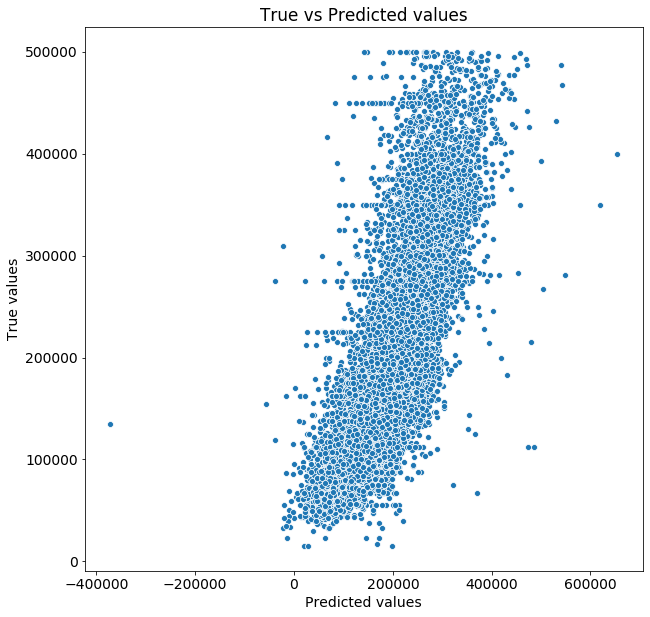

In [68]:
y_train_preds = lr_model.predict(X_train)
evaluate_preds(y_train.values.flatten(), y_train_preds.flatten())

R2:	0.603
MAE:	45005.493
MSE:	3757231352.794


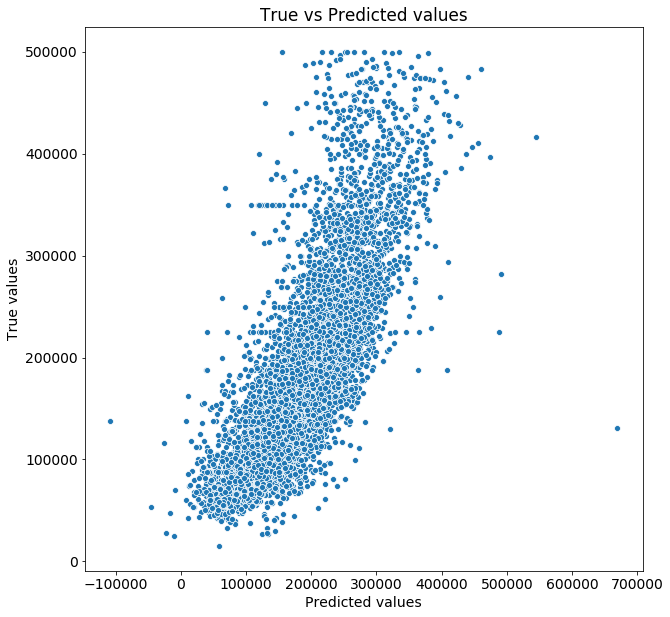

In [69]:
y_test_preds = lr_model.predict(X_test)
evaluate_preds(y_test.values.flatten(), y_test_preds.flatten())

In [70]:
lr_model.intercept_

array([-2004401.41437553])

In [71]:
coefs = pd.DataFrame()
coefs['coefs'] = np.append(lr_model.coef_.flatten(), lr_model.intercept_)
coefs['name'] = np.append(X_test.columns.tolist() , 'intercept')
coefs.sort_values('coefs').reset_index(drop = True)

,coefs,name
0,-2.004401e+06,intercept
1,-6.018269e+04,INLAND
2,-2.715887e+04,NEAR BAY
3,-2.364877e+04,longitude
4,-2.169514e+04,latitude
5,-2.116378e+04,<1H OCEAN
6,-1.491403e+04,NEAR OCEAN
7,-2.579796e+01,population
8,-7.353045e+00,total_rooms
9,4.808496e+01,households


**Random Forest**

In [78]:
rf_model = RandomForestRegressor(max_depth=14, n_estimators= 30)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=14, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [87]:
#RandomForestRegressor устойчив к переобучению, поэтому покажем на примере более сложной модели GradientBoostingRegressor

r2_train = []
r2_test = []
for i in range(2,17,2):
    rf_model = GradientBoostingRegressor(max_depth=i, n_estimators=30)
    rf_model.fit(X_train, y_train)
    pred_train_ = rf_model.predict(X_train)
    pred_test_ = rf_model.predict(X_test)
    r2_train.append(r2(y_train, pred_train_))
    r2_test.append(r2(y_test,pred_test_))

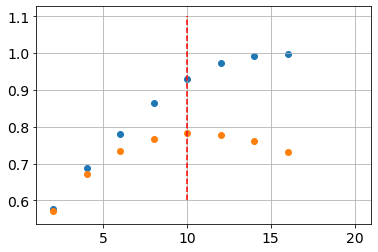

In [89]:
# Наблюдаем переобучение, когда max_depth > 8
plt.scatter(list(range(2,17,2)), r2_train)
plt.scatter(list(range(2,17,2)), r2_test)
plt.plot([10]*10, np.linspace(0.6, 1.1, 10), '--', c = 'r')
plt.xlim(1,21)
plt.grid(1)

In [82]:
? RandomForestRegressor

In [27]:
# Продолжаем работать с RandomForestRegressor
y_train_preds = rf_model.predict(X_train)
y_train_preds

array([239508.123936  , 174119.88981783, 147667.93424889, ...,
       147477.66957643, 229678.73536329, 322998.15526856])

In [42]:
y_train.describe()

,median_house_value
count,13772.000000
mean,192989.268008
std,97980.516125
min,14999.000000
25%,116700.000000
50%,174100.000000
75%,250000.000000
max,500000.000000


In [39]:
pd.Series( y_train_preds).describe()

count     13772.000000
mean     193046.155408
std       88467.818445
min       41938.595546
25%      123663.508413
50%      181293.854257
75%      246072.150005
max      475907.583333
dtype: float64

R2:	0.996
MAE:	4604.379
MSE:	34532113.607


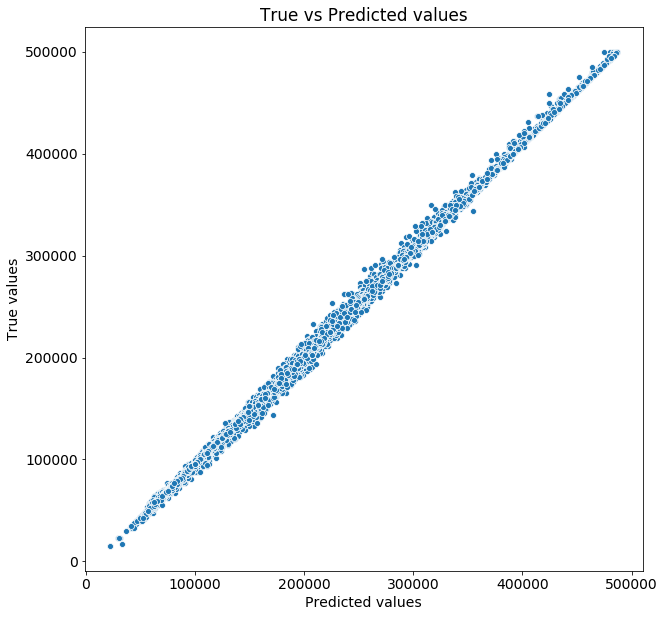

In [90]:
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train.values.flatten(), y_train_preds.flatten())

R2:	0.732
MAE:	34084.355
MSE:	2535770112.099


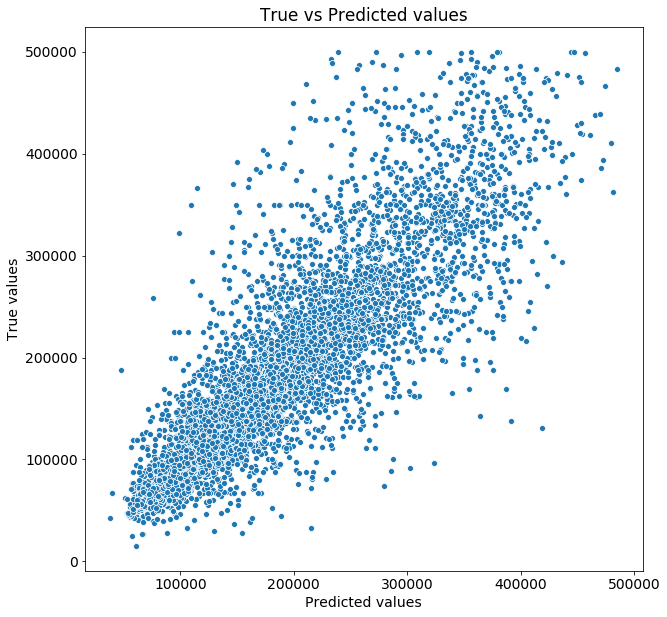

In [91]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test.values.flatten(), y_test_preds.flatten())

**Gradient Boosting**

In [59]:
gb_model = GradientBoostingRegressor(max_depth=8)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [85]:
? GradientBoostingRegressor

R2:	0.946
MAE:	16575.726
MSE:	515760323.582


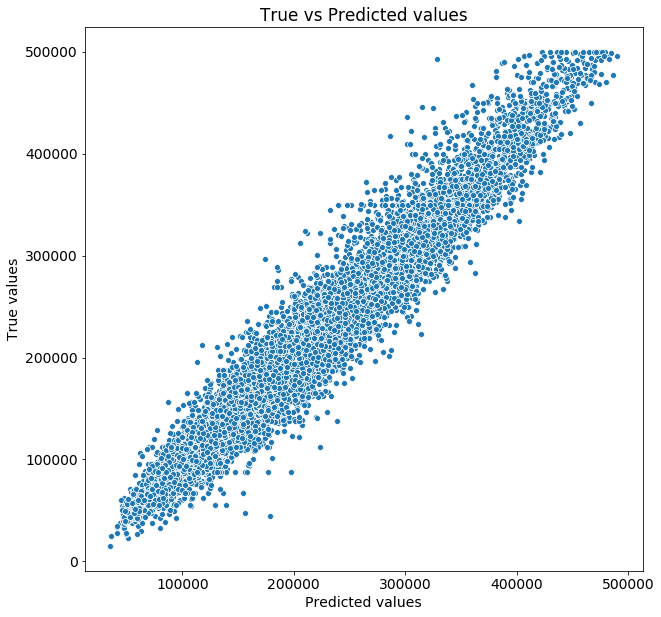

In [60]:
y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train.values.flatten(), y_train_preds.flatten())

R2:	0.8
MAE:	28981.118
MSE:	1885265864.771


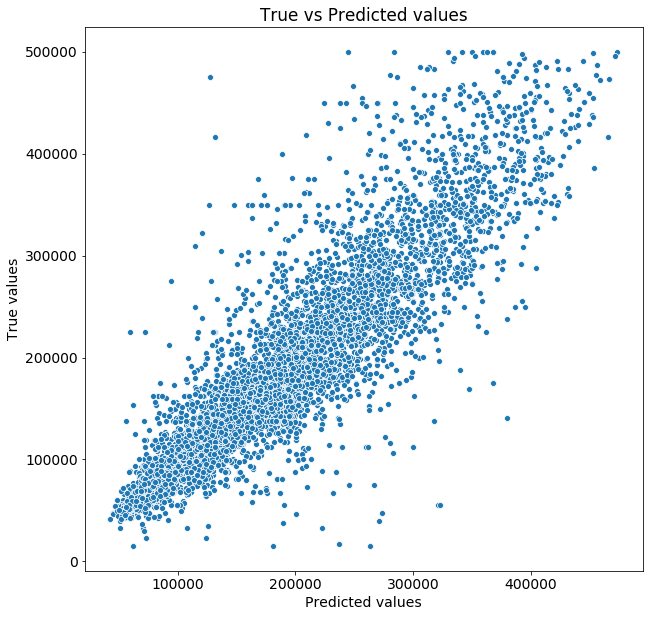

In [61]:
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_test.values.flatten(), y_test_preds.flatten())

### Настройка и оценка финальной модели

**Подбор гиперпараметров**

In [54]:
#gb_model = rf_model(random_state=21)
#gb_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=21, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [92]:

params = {'n_estimators':[ 30, 150], 
          'max_depth':[ 7, 9, 11]}

gs = GridSearchCV(rf_model, params, scoring='r2', cv=4, n_jobs=-1)
gs.fit(X, y)

GridSearchCV(cv=4, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=16,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=30,
                                                 n_iter_no_change=None,
                 

In [93]:
# лучшие параметры
gs.best_params_

{'max_depth': 9, 'n_estimators': 150}

In [95]:
gs.cv_results_

{'mean_fit_time': array([ 2.99717444,  9.72963989,  2.30828857, 11.97991663,  2.84438503,
        14.03535575]),
 'std_fit_time': array([0.05834835, 0.03318677, 0.02283784, 0.08785835, 0.04664086,
        0.08585197]),
 'mean_score_time': array([0.0081051 , 0.02319998, 0.01197207, 0.03694218, 0.01409316,
        0.04338413]),
 'std_score_time': array([0.00113773, 0.00163662, 0.0019908 , 0.00406399, 0.0022365 ,
        0.00278768]),
 'param_max_depth': masked_array(data=[7, 7, 9, 9, 11, 11],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[30, 150, 30, 150, 30, 150],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 7, 'n_estimators': 30},
  {'max_depth': 7, 'n_estimators': 150},
  {'max_depth': 9, 'n_estimators': 30},
  {'max_depth': 9, 'n_estimators': 150},
  {'max_depth': 11, 'n_estimator

**Обучение и оценка модели**

In [96]:
final_model = RandomForestRegressor(n_estimators=150, max_depth=14, random_state=21)
final_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=14, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=21, verbose=0, warm_start=False)

R2:	0.936
MAE:	17699.293
MSE:	617638312.859


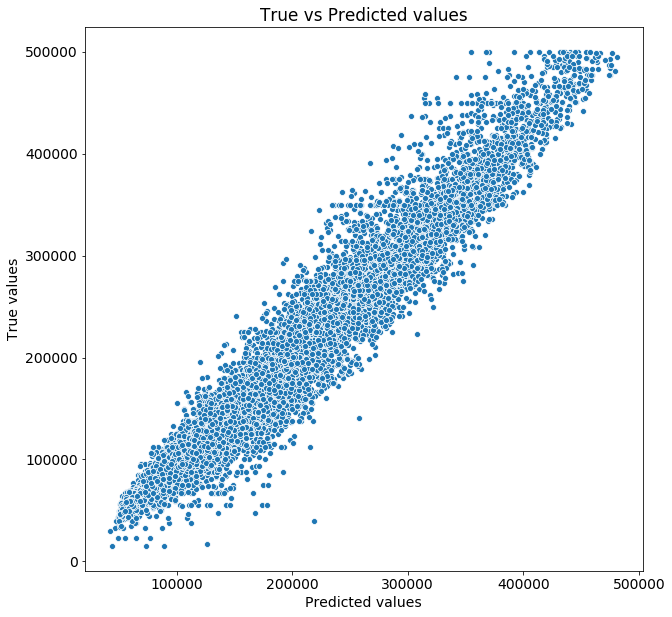

In [97]:
y_train_preds = final_model.predict(X_train)
evaluate_preds(y_train.values.flatten(), y_train_preds.flatten())

R2:	0.783
MAE:	31054.179
MSE:	2056680258.553


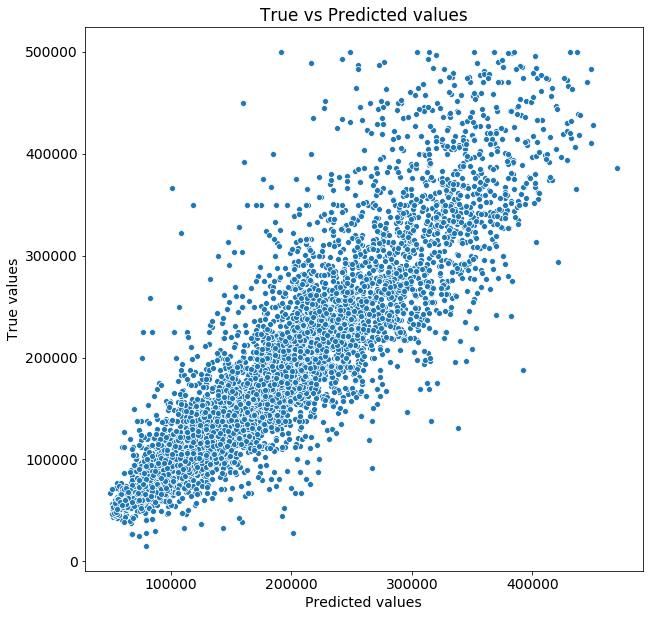

In [98]:
y_test_preds = final_model.predict(X_test)
evaluate_preds(y_test.values.flatten(), y_test_preds.flatten())

**Важность признаков**

In [100]:
final_model.feature_importances_

array([1.15421431e-01, 1.06843292e-01, 4.46725758e-02, 2.47536923e-02,
       2.46373730e-02, 3.14242096e-02, 1.99061354e-02, 4.51357711e-01,
       3.85575034e-03, 1.67681633e-01, 1.85061024e-04, 6.68007459e-04,
       8.59312752e-03])

In [102]:
feature_importances = pd.DataFrame()
feature_importances['importance'] = final_model.feature_importances_
feature_importances['feature_name'] = X_train.columns.tolist()
feature_importances.sort_values(by='importance', ascending=False).reset_index(drop = True)

,importance,feature_name
0,0.451358,median_income
1,0.167682,INLAND
2,0.115421,longitude
3,0.106843,latitude
4,0.044673,housing_median_age
5,0.031424,population
6,0.024754,total_rooms
7,0.024637,total_bedrooms
8,0.019906,households
9,0.008593,NEAR OCEAN


### Сохранение модели

**Scaler**

In [103]:
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

**Model**

In [104]:
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(final_model, file)

In [105]:
with open(MODEL_FILE_PATH, 'rb') as file:
    model_load=pickle.load(file)

In [106]:
model_load.predict(X_test)==y_test_preds

array([ True,  True,  True, ...,  True,  True,  True])